In [1]:
from constants import*
from functions import*
#from functionsRosei import*
#from constantsRosei import*
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import Normalize
from scipy.interpolate import CubicSpline
import PyMieScatt as mie

0.0177717228363


In [10]:
print('Drude Parameters')
print('----------------')
print('gammaBulk = {:.4g}' .format(gammaBu))
print('Eplasma = {:.4g}' .format(Eplasma))
print('Eg = {:.4g}' .format(Cnuf))

print('--------------------')
print('Interband Parameters')
print('--------------------')
print('gammab = {:.4g}' .format(gammaIB))
print('Eg = {:.4g}' .format(Eg))
print('C*nuf: {:.4g}' .format(Cnuf))

dataFolder = 'data/'

Drude Parameters
----------------
gammaBulk = 0.01777
Eplasma = 9.083
Eg = 0.7425
--------------------
Interband Parameters
--------------------
gammab = 0.09873
Eg = 1.91
C*nuf: 0.7425


# Drude Bulk

In [3]:
lowerEnergy = 1.38#*1e16/hbarE  900nm
upperEnergy = 6.2#*1e16/hbarE   200nm
energies = np.linspace(lowerEnergy, upperEnergy, 300)
wavelengths = hE*c*1e-6/energies
#drudeReal = funcDrudeReal(energies, Eplasma, 1, gammaBu)
#drudeImag = funcDrudeImag(energies, Eplasma, gammaBu)

rBulk = 100
drudeBulk = funcDrudeSize(energies, Eplasma, gammaBulk, rBulk, False)


# Interband Bulk

In [4]:
Tamb = 300     #K

#dielIBreal = np.array([funcDielIBreal(E, Eg, gammaIB, Kbulk, Ef, Tamb) for E in energies])
#dielIBimag = np.array([funcDielIBimag(E, Eg, gammaIB, Kbulk, Ef, Tamb) for E in energies])
dielIBbulk = np.array([funcDielIBsize(E, rBulk, Eg, gammaIB, Ef, Tamb) for E in energies])


c:\Users\Usuario\Desktop\temp\ThesisDataTreatment\functions.py:48: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E-Ef)/(k*T)))


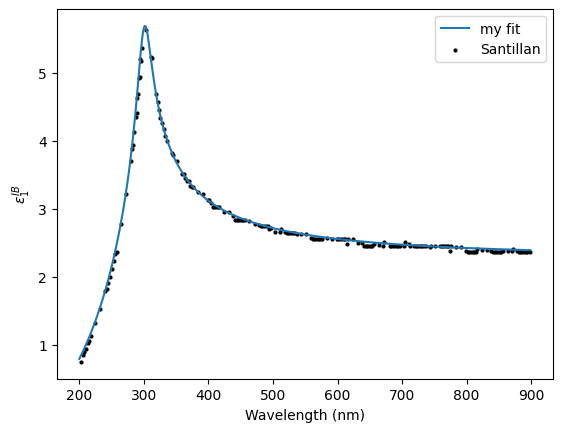

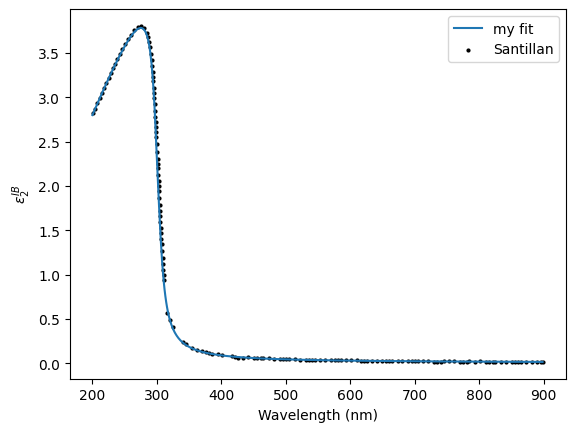

In [11]:
#Compare Dielectric Function of the Interband
dataIBreal = np.loadtxt(dataFolder+'SantillanIBreal.csv', delimiter=',')
dataIBimag1 = np.loadtxt(dataFolder+'SantillanIBimag1.csv', delimiter=',')
dataIBimag2 = np.loadtxt(dataFolder+'SantillanIBimag2.csv', delimiter=',')
dataIBimag = np.vstack((dataIBimag2,dataIBimag1))

dataIBrealWavelenght = dataIBreal[:,0]
dataIBrealDiel = dataIBreal[:,1]
#dataIBrealEnergies = hE*c*1e-6/dataIBrealWavelenght

dataIBimagWavelenght = dataIBimag[:,0]
dataIBimagDiel = dataIBimag[:,1]
#dataIBimagEnergies = hE*c*1e-6/dataIBimagWavelenght

Figure, ax = plt.subplots()
ax.plot(wavelengths, dielIBbulk.real, label='my fit')
ax.scatter(dataIBrealWavelenght, dataIBrealDiel, s=4, color = 'black', label = 'Santillan')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$\\varepsilon_1^{IB}$')
ax.legend()
plt.show()

Figure, ax = plt.subplots()
ax.plot(wavelengths, dielIBbulk.imag, label='my fit')
ax.scatter(dataIBimagWavelenght, dataIBimagDiel, s=4, color = 'black', label = 'Santillan')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$\\varepsilon_2^{IB}$')
ax.legend()
plt.show()


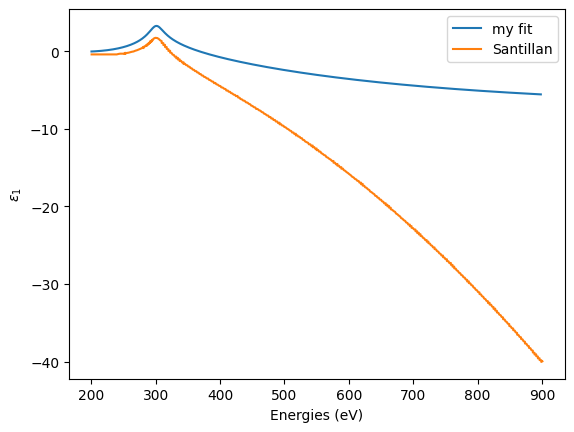

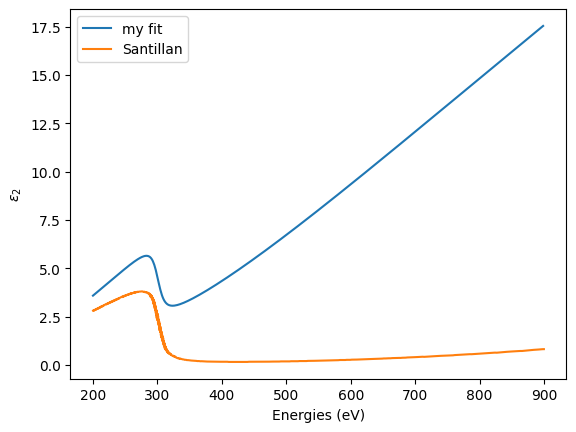

In [12]:
#Compare the complete dielectric function (including Drude contribution)
dielBulk = drudeBulk + dielIBbulk

dataReal = np.loadtxt(dataFolder+'2013SantillanRealComplete.csv', delimiter=',')
dataImag = np.loadtxt(dataFolder+'2013SantillanImagComplete.csv', delimiter=',')

dataRealWavelengths = dataReal[:,0]
dataRealDiel = dataReal[:,1]
dataImagWavelengths = dataImag[:,0]
dataImagDiel = dataImag[:,1]

Figure, ax = plt.subplots()
ax.plot(wavelengths, dielBulk.real, label='my fit')
ax.plot(dataRealWavelengths, dataRealDiel, label = 'Santillan')
ax.set_xlabel('Energies (eV)')
ax.set_ylabel('$\\varepsilon_1$')
ax.legend()
#ax.set_ylim(-5,5)
plt.show()

Figure, ax = plt.subplots()
ax.plot(wavelengths, dielBulk.imag, label='my fit')
ax.plot(dataImagWavelengths, dataImagDiel, label = 'Santillan')
ax.set_xlabel('Energies (eV)')
ax.set_ylabel('$\\varepsilon_2$')
ax.legend()
plt.show()

## Extinction Coefficient: Ag "Bulk"

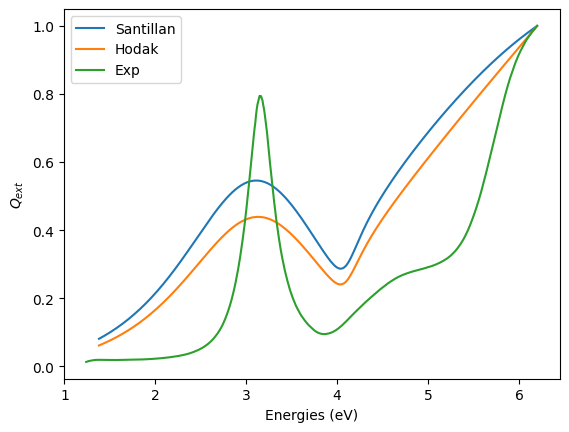

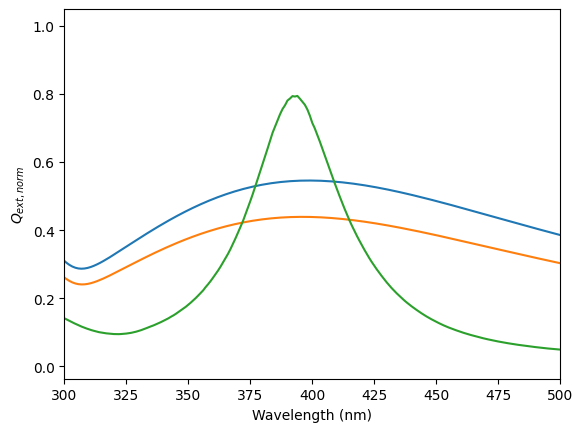

In [13]:
r = 2          #nm
dataWater = np.loadtxt(dataFolder+'SegelsteinWaterDielectric.csv', delimiter=',') #x Axis is in micrometers
dataWaterWavelength = dataWater[:,0] * 1e3 #in nm
nWaterReal = dataWater[:,1]
nWaterImag = dataWater[:,2]

nWater = convertToInterpolatedComplex(dataWaterWavelength, nWaterReal, dataWaterWavelength, nWaterImag, wavelengths)
dielWater = refractionIndexToDielectricFunc(nWater)
nWaterFixed = np.ones(len(wavelengths))*1.33 + 1j*np.zeros(len(wavelengths))
dielWaterFixed = refractionIndexToDielectricFunc(nWaterFixed)

extCoeffBulk = funcExtCoeff(r, wavelengths, dielBulk, nWater)
extCoeffBulkHodak = funcAbsorbanceHodak(energies, dielBulk, dielWater)

dataAbsorbance = np.loadtxt(dataFolder+'absorbance30uJafter.csv', delimiter=',')
dataAbsWavelenght = dataAbsorbance[:,0]
dataAbsEnergies = hE*c*1e-6/dataAbsWavelenght
dataAbs = dataAbsorbance[:,1]


Figure, ax = plt.subplots()
ax.plot(energies, extCoeffBulk/max(extCoeffBulk), label = 'Santillan')
ax.plot(energies, extCoeffBulkHodak/max(extCoeffBulkHodak), label = 'Hodak')
ax.plot(dataAbsEnergies, dataAbs/max(dataAbs), label = 'Exp')
ax.legend()
ax.set_xlabel('Energies (eV)')
ax.set_ylabel('$Q_{ext}$')
plt.show()


Figure, ax = plt.subplots()
ax.plot(wavelengths, extCoeffBulk/max(extCoeffBulk), label = 'Santillan')
ax.plot(wavelengths, extCoeffBulkHodak/max(extCoeffBulkHodak), label = 'Hodak')
ax.plot(dataAbsWavelenght, dataAbs/max(dataAbs))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{ext,norm}$')
ax.set_xlim(300, 500)
plt.show()


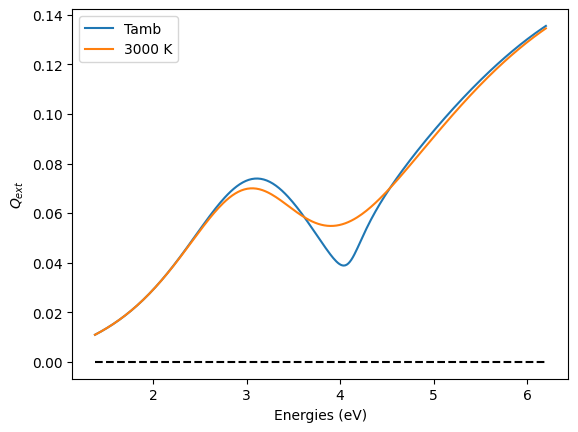

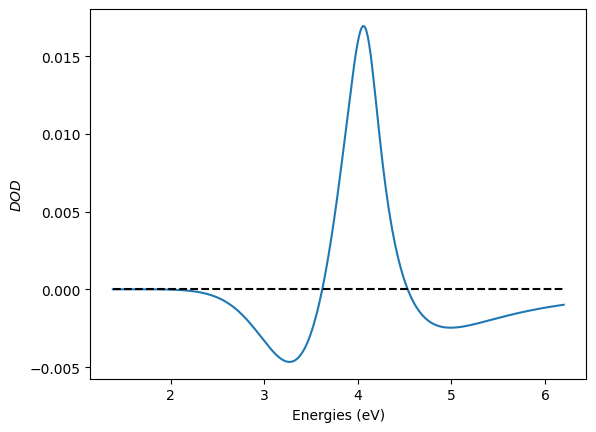

In [14]:
#High T
T = 3000        #K
dielIBbulkT = np.array([funcDielIBsize(E, rBulk, Eg, gammaIB, Ef, T) for E in energies])

dielBulkT = drudeBulk + dielIBbulkT

extCoeffBulkT = funcExtCoeff(r, wavelengths, dielBulkT, nWater)

Figure, ax = plt.subplots()
ax.plot(energies, extCoeffBulk,label = 'Tamb')
ax.plot(energies, extCoeffBulkT, label = '{:.4g} K' .format(T))
ax.set_xlabel('Energies (eV)')
ax.set_ylabel('$Q_{ext}$')
ax.hlines(0, energies[0], energies[-1], color = 'black', linestyles='--')
#ax.set_xlim(2.6,3.8)
ax.legend()
plt.show() 

DOD = extCoeffBulkT - extCoeffBulk 
Figure, ax = plt.subplots()
ax.plot(energies, DOD)
ax.set_xlabel('Energies (eV)')
ax.set_ylabel('$DOD$')
ax.hlines(0, energies[0], energies[-1], color = 'black', linestyles='--')
#ax.set_xlim(2.6,3.8)
#ax.set_ylim(-1,2)
plt.show()


# CoreShell Test

## Drude

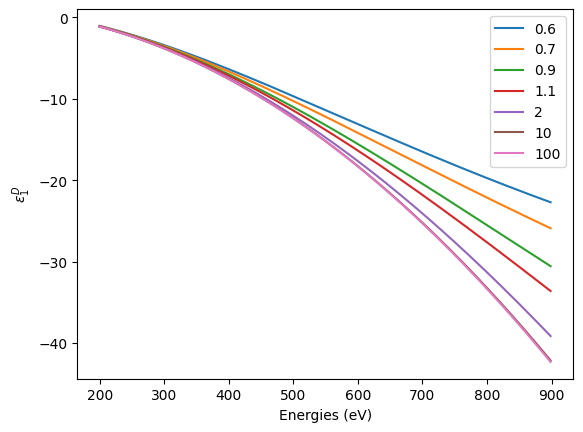

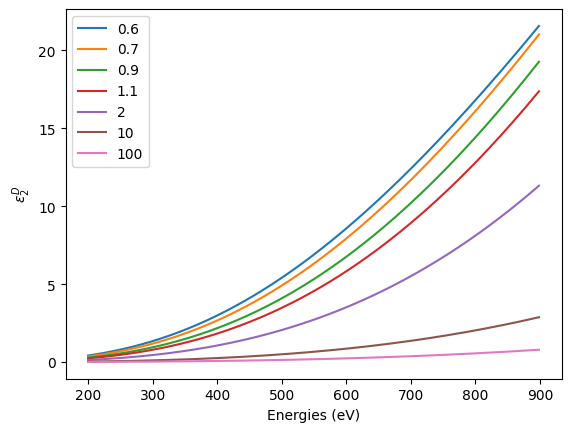

In [15]:
rs = [0.6, 0.7, 0.9, 1.1, 2, 10, 100]

Figure, ax = plt.subplots()
for r in rs:
    drudeSize = funcDrudeSize(energies, Eplasma, gammaBu, r, False)
    ax.plot(wavelengths, drudeSize.real, label = str(r) )
ax.set_xlabel('Energies (eV)')
ax.set_ylabel('$\\varepsilon_1^{D}$')
ax.legend()
plt.show()

Figure, ax = plt.subplots()
for r in rs:
    drudeSize = funcDrudeSize(energies, Eplasma, gammaBu, r, False)
    ax.plot(wavelengths, drudeSize.imag, label = str(r) )
ax.set_xlabel('Energies (eV)')
ax.set_ylabel('$\\varepsilon_2^{D}$')
ax.legend()
plt.show()
    

## Interband

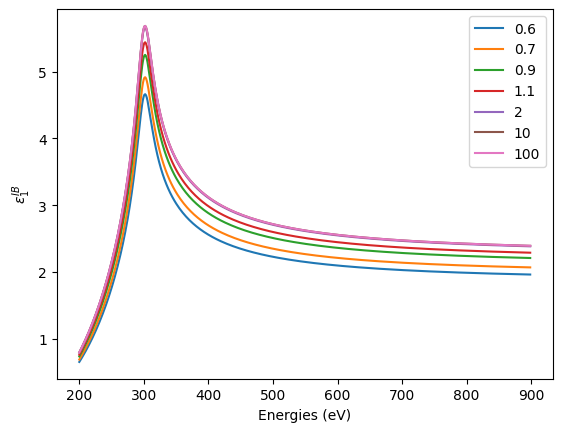

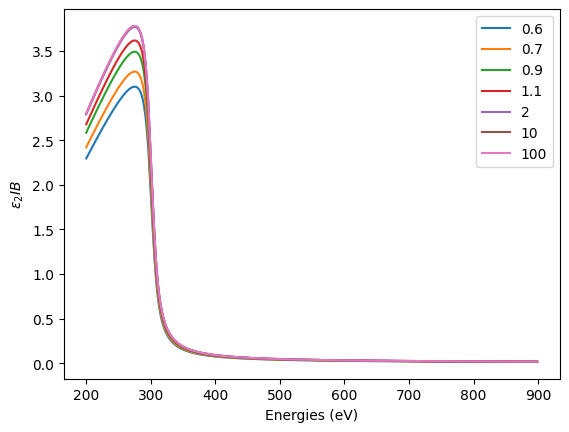

In [16]:
Figure, ax = plt.subplots()

for r in rs:
    dielSize = np.array([funcDielIBsize(E,r,Eg,gammaIB,Ef,Tamb) for E in energies])
    ax.plot(wavelengths, dielSize.real, label = str(r) )
ax.set_xlabel('Energies (eV)')
ax.set_ylabel('$\\varepsilon_1^{IB}$')
ax.legend()
plt.show()

Figure, ax = plt.subplots()
for r in rs:
    dielSize = np.array([funcDielIBsize(E,r,Eg,gammaIB,Ef,Tamb) for E in energies])
    ax.plot(wavelengths, dielSize.imag, label = str(r) )
ax.set_xlabel('Energies (eV)')
ax.set_ylabel('$\\varepsilon_2{IB}$')
ax.legend()
plt.show()

# Extinction Coefficient: Core Shell Test and DOD

In [17]:
rCore = 6.5     #nm 
rTot = rCore+0.2 #nm

dielCoreIB = np.array([funcDielIBsize(E,rCore,Eg,gammaIB,Ef,Tamb) for E in energies])
dielCoreDrude = funcDrudeSize(energies, Eplasma, gammaBu, rCore, False)
dielCore = dielCoreDrude + dielCoreIB

dataDielShellReal = np.loadtxt(dataFolder+'epsAg2Oreal.csv', delimiter=',')
dataDielShellImag = np.loadtxt(dataFolder+'epsAg2Oimag.csv', delimiter=',')
dielShell = convertToInterpolatedComplex(dataDielShellReal[:,0], dataDielShellReal[:,1], dataDielShellImag[:,0], dataDielShellImag[:,1], wavelengths)
#dielCoreReal2 = np.column_stack((wavelengths, dielCore.real))
#dielCoreImag2 = np.column_stack((wavelengths, dielCore.imag))

extCoeffCoreShell = funcAbsCoeffCoreShell(rCore, rTot, wavelengths, dielCore, dielShell, nWater)
extCoeffCoreOnly = funcExtCoeff(rCore, wavelengths, dielCore, nWater)  
extCoeffCoreShellCollapsed = funcAbsCoeffCoreShell(rTot, rTot, wavelengths, dielCore, dielCore, nWater)
extCoeffCoreShellFixed = funcExtCoeff(rCore, wavelengths, dielCore, nWaterFixed)
absHodakTest = funcAbsorbanceHodak(energies, dielCore, dielWaterFixed)

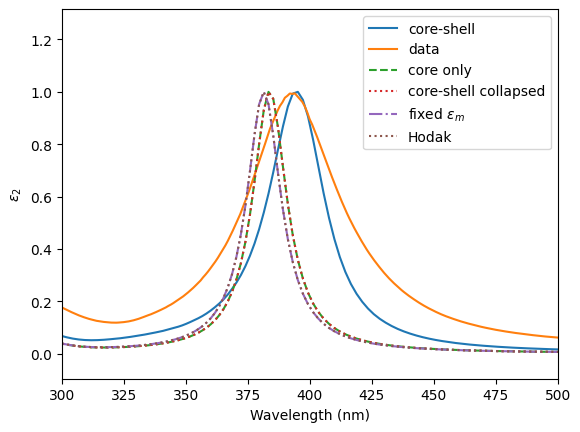

In [18]:
Figure, ax = plt.subplots()
ax.plot(wavelengths, extCoeffCoreShell/max(extCoeffCoreShell), label = 'core-shell')
ax.plot(dataAbsWavelenght, dataAbs*0.77, label = 'data')
ax.plot(wavelengths, extCoeffCoreOnly/max(extCoeffCoreOnly), label = 'core only', linestyle = '--')
ax.plot(wavelengths, extCoeffCoreShellCollapsed/max(extCoeffCoreShellCollapsed), label = 'core-shell collapsed', linestyle = ':')
ax.plot(wavelengths, extCoeffCoreShellFixed/max(extCoeffCoreShellFixed), label = 'fixed $\\varepsilon_m$', linestyle = '-.')
ax.plot(wavelengths, absHodakTest/max(absHodakTest), label = 'Hodak', linestyle = ':')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$\\varepsilon_2$')
ax.legend()
ax.set_xlim(300, 500)
plt.show()


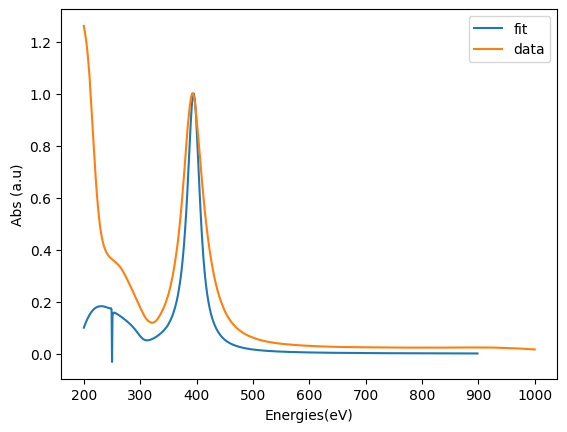

In [19]:
Figure, ax = plt.subplots()
ax.plot(wavelengths, extCoeffCoreShell/max(extCoeffCoreShell), label = 'fit')
ax.plot(dataAbsWavelenght, dataAbs/1.29, label = 'data')
ax.set_xlabel('Energies(eV)')
ax.set_ylabel('Abs (a.u)')
ax.legend()
plt.show()

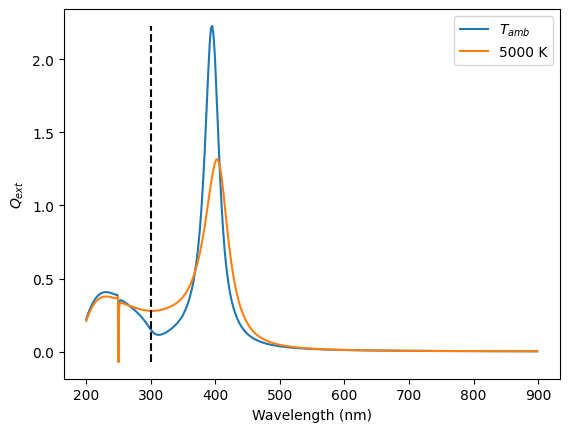

In [20]:
T = 5000            #K
dielCoreIBT = np.array([funcDielIBsize(E,rCore,Eg,gammaIB,Ef,T) for E in energies])
dielCoreT = dielCoreDrude + dielCoreIBT

extCoeffCoreShellT = funcAbsCoeffCoreShell(rCore, rTot, wavelengths, dielCoreT, dielShell, nWater)

upperLim = hE*c*1e-6/300

Figure, ax = plt.subplots()
ax.plot(wavelengths, extCoeffCoreShell, label = '$T_{amb}$')
ax.plot(wavelengths, extCoeffCoreShellT, label = '{:.4g} K' .format(T))
ax.vlines(300, min(extCoeffCoreShell), max(extCoeffCoreShell), linestyle = '--', color = 'black')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{ext}$')
ax.legend()
plt.show()

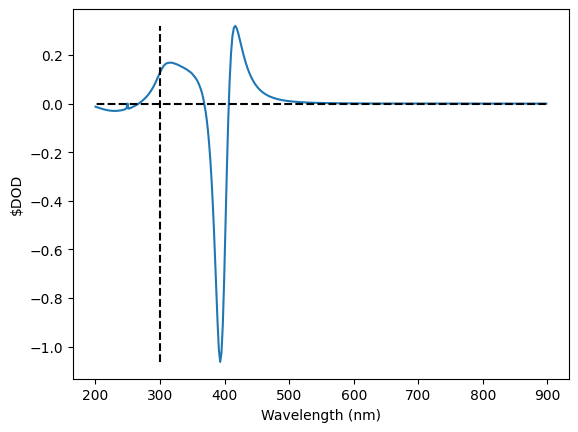

In [21]:
DOD = extCoeffCoreShellT - extCoeffCoreShell
Figure, ax = plt.subplots()
ax.plot(wavelengths, DOD)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$DOD')
ax.hlines(0, wavelengths[0], wavelengths[-1], color = 'black', linestyles='--')
ax.vlines(300, min(DOD), max(DOD), linestyle = '--', color = 'black')
#ax.set_ylim(0,0.05)
plt.show()

In [22]:
rMean = 6
rSD = 2

averageExtCoeffCore = []
for i in range(len(wavelengths)):
    singleExtCoeff = average(rMean, rSD, funcExtCoeff, wavelengths[i], dielCore[i], nWater[i])
    averageExtCoeffCore.append(singleExtCoeff)

averageExtCoeffCore2 = np.array(averageExtCoeffCore)

rMin = 0
rMax = 20

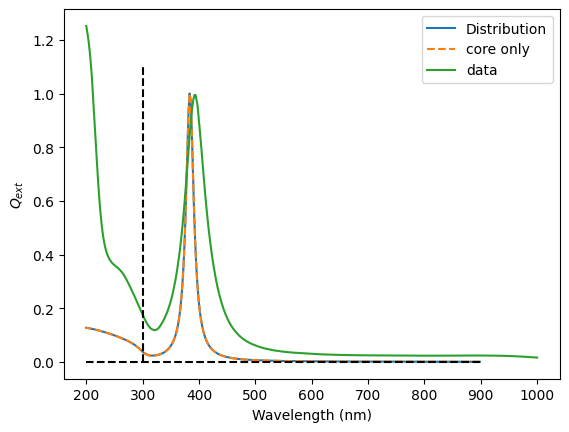

c:\Users\Usuario\Desktop\temp\ThesisDataTreatment\functions.py:238: RuntimeWarning: divide by zero encountered in divide
  return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
c:\Users\Usuario\Desktop\temp\ThesisDataTreatment\functions.py:238: RuntimeWarning: divide by zero encountered in log
  return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
c:\Users\Usuario\Desktop\temp\ThesisDataTreatment\functions.py:238: RuntimeWarning: invalid value encountered in multiply
  return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2/(2*sigma**2))


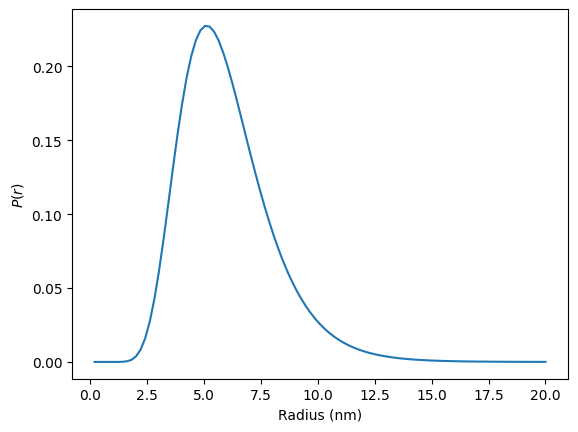

In [23]:
Figure, ax = plt.subplots()
ax.plot(wavelengths, averageExtCoeffCore2/max(averageExtCoeffCore2), label = 'Distribution')
ax.plot(wavelengths, extCoeffCoreOnly/max(extCoeffCoreOnly), label = 'core only', linestyle = '--')
ax.plot(dataAbsWavelenght, dataAbs*0.77, label = 'data')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{ext}$')
ax.hlines(0, wavelengths[0], wavelengths[-1], color = 'black', linestyles='--')
ax.vlines(300, 0, 1.1, linestyle = '--', color = 'black')
ax.legend()
#ax.set_ylim(0,0.05)
plt.show()

radius = np.linspace(rMin, rMax, 100)
Figure, ax = plt.subplots()
ax.plot(radius, logNormalDistribution(radius, rMean, rSD))
ax.set_xlabel('Radius (nm)')
ax.set_ylabel('$P(r)$')
#ax.set_ylim(0,0.05)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_72\3506360953.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


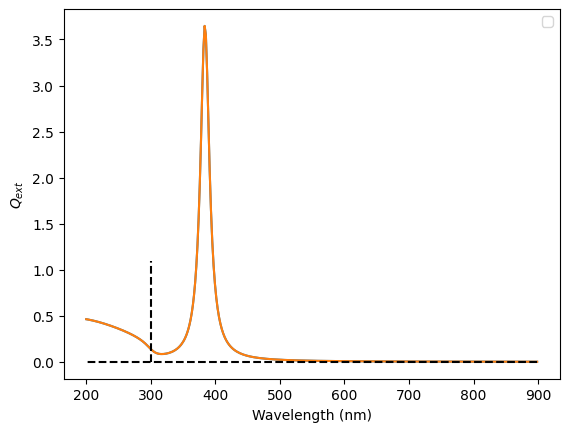

In [24]:
test = np.array([singleFullAbsCoeffCore(rCore, energies[i], Eplasma, gammaBu, Eg, gammaIB, Ef, Tamb, nWater[i]) for i in range(len(energies))])


Figure, ax = plt.subplots()
ax.plot(wavelengths, test)
ax.plot(wavelengths, extCoeffCoreOnly)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{ext}$')
ax.hlines(0, wavelengths[0], wavelengths[-1], color = 'black', linestyles='--')
ax.vlines(300, 0, 1.1, linestyle = '--', color = 'black')
ax.legend()
#ax.set_ylim(0,0.05)
plt.show()

# PyMieScatt

C:\Users\Usuario\AppData\Roaming\Python\Python313\site-packages\PyMieScatt\CoreShell.py:12: UserWarning: Note: the use of nMedium was incorporated naievely and the result should be carefully scrutinized.
  warnings.warn("Note: the use of nMedium was incorporated naievely and the result should be carefully scrutinized.")


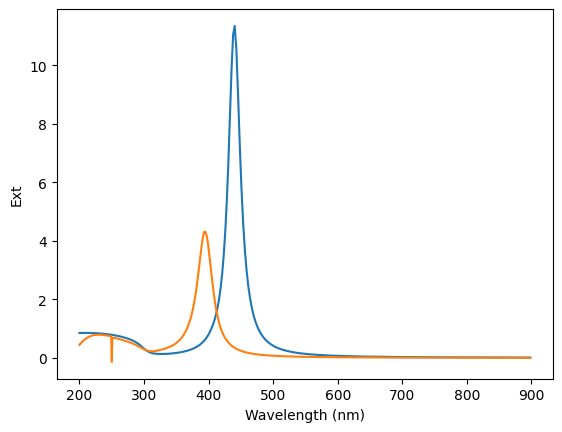

In [25]:
# Cargo los datos de indices de refraccion
nAgComplex = np.sqrt(dielCore)
nAgs = nAgComplex.real
kAgs = nAgComplex.imag

qs = []

#Only Ag
for wl,nAg,kAg in zip(wavelengths, nAgs, kAgs):
    qs.append(mie.MieQCoreShell(nAg+kAg*1j,nAg+kAg*1j,wl,2*rCore,rTot*2,nMedium=1.77,asDict=True)['Qext'])

fig, ax = plt.subplots()
ax.plot(wavelengths, qs, label = 'Ag-Ag')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Ext')
#plt.savefig('..\\Resultados PyMieScatt\\Graficos\\'+ title.replace(' ','_').replace(':','-') + '_PyMieScatt.jpg',format='jpg',dpi=200)
#plt.show()


#Core Ag - Ag2O
dielShellRealInterpolartor = interpolate.interp1d(dataDielShellReal[:,0], dataDielShellReal[:,1], kind = 'cubic', fill_value='extrapolate' )
dielShell1 = dielShellRealInterpolartor(wavelengths)
dielShellImagInterpolator = interpolate.interp1d(dataDielShellImag[:,0], dataDielShellImag[:,1], kind = 'cubic', fill_value='extrapolate')
dielShell2 = dielShellImagInterpolator(wavelengths)

nAg2OsComplex = np.sqrt(dielShell1 + dielShell2*1j)
nAg2Os = nAg2OsComplex.real
kAg2Os = nAg2OsComplex.imag


qsCoreShell = []
for wl,nAg,kAg,nAg2O,kAg2O in zip(wavelengths, nAgs, kAgs, nAg2Os, kAg2Os):
    qsCoreShell.append(mie.MieQCoreShell(nAg+kAg*1j,nAg2O+kAg2O*1j,wl,2*rCore,rTot*2,nMedium=1.33,asDict=True)['Qext'])

#fig, ax = plt.subplots()
ax.plot(wavelengths, qsCoreShell, label = 'Ag-Ag2O')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Ext')
#plt.savefig('..\\Resultados PyMieScatt\\Graficos\\'+ title.replace(' ','_').replace(':','-') + '_PyMieScatt.jpg',format='jpg',dpi=200)
#ax.set_ylim(0, 0.06)
plt.show()

# Absorbance Test

(-8.57597453354904+10.286955295237213j)
(-19.018889254130364+3.488217557573436j)


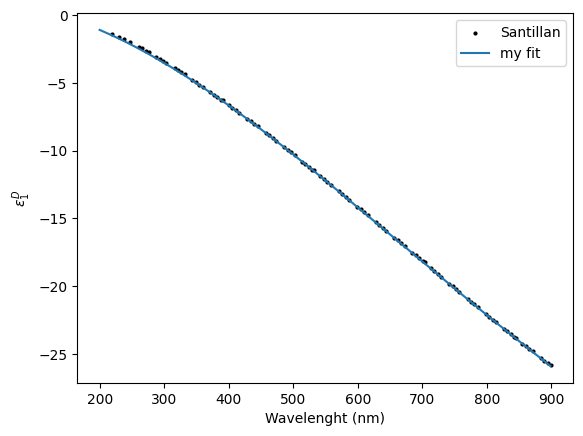

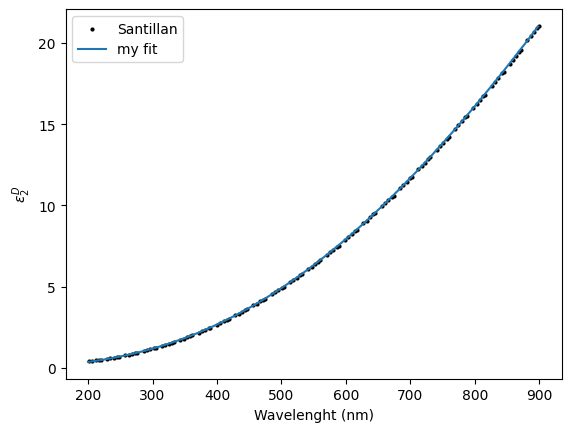

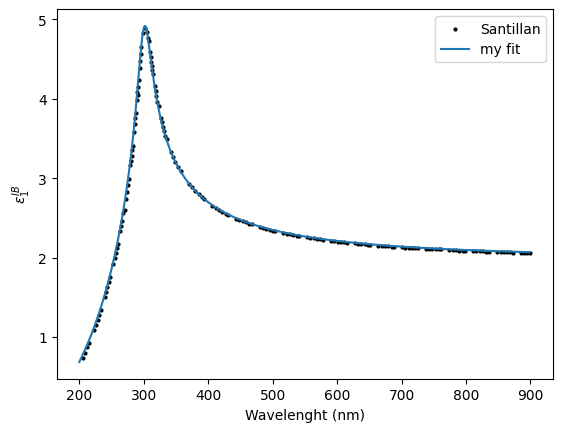

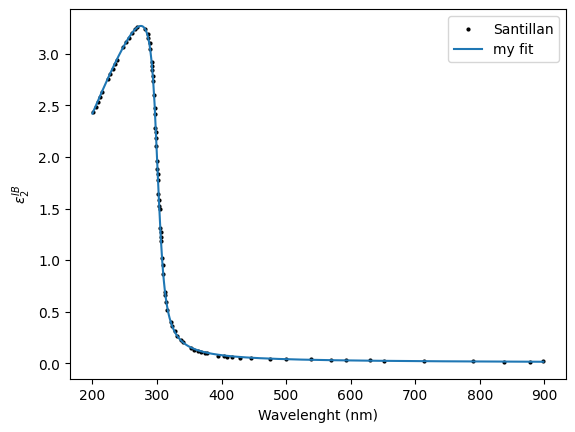

In [26]:
rCoreTest = 0.7                 #nm
rTotTest = rCoreTest + 0.35     #nm

dataDrudeReal07 = np.loadtxt(dataFolder+'07nmDielDrudeReal.csv', delimiter=',')
dataDrudeImag07 = np.loadtxt(dataFolder+'07nmDielDrudeImag.csv', delimiter=',')
dataIBReal07 = np.loadtxt(dataFolder+'07nmDielIBreal.csv', delimiter=',')
dataIBImag07 = np.loadtxt(dataFolder+'07nmDielIBimag.csv', delimiter=',')

dielCoreIBtest = np.array([funcDielIBsize(E,rCoreTest,Eg,gammaIB,Ef,Tamb) for E in energies])
dielCoreDrudeTest = funcDrudeSize(energies, Eplasma, gammaBu, rCoreTest, False)
dielCoreTest = dielCoreDrudeTest + dielCoreIBtest

print(funcDrudeSize(2,Eplasma,2,5,False))
print(funcDrudeSize(2,Eplasma,0.2,5,False))

Figure, ax = plt.subplots()
ax.scatter(dataDrudeReal07[:,0], dataDrudeReal07[:,1], s = 4, label='Santillan', color= 'black')
ax.plot(wavelengths, dielCoreDrudeTest.real, label = 'my fit')
ax.set_xlabel('Wavelenght (nm)')
ax.set_ylabel('$\\varepsilon_1^{D}$')
ax.legend()
plt.show()

Figure, ax = plt.subplots()
ax.scatter(dataDrudeImag07[:,0], dataDrudeImag07[:,1], s = 4, label='Santillan', color= 'black')
ax.plot(wavelengths, dielCoreDrudeTest.imag, label = 'my fit')
ax.set_xlabel('Wavelenght (nm)')
ax.set_ylabel('$\\varepsilon_2^{D}$')
ax.legend()
plt.show()

Figure, ax = plt.subplots()
ax.scatter(dataIBReal07[:,0], dataIBReal07[:,1], s = 4, label='Santillan', color= 'black')
ax.plot(wavelengths, dielCoreIBtest.real, label = 'my fit')
ax.set_xlabel('Wavelenght (nm)')
ax.set_ylabel('$\\varepsilon_1^{IB}$')
ax.legend()
plt.show()

Figure, ax = plt.subplots()
ax.scatter(dataIBImag07[:,0], dataIBImag07[:,1], s = 4, label='Santillan', color= 'black')
ax.plot(wavelengths, dielCoreIBtest.imag, label = 'my fit')
ax.set_xlabel('Wavelenght (nm)')
ax.set_ylabel('$\\varepsilon_2^{IB}$')
ax.legend()
plt.show()


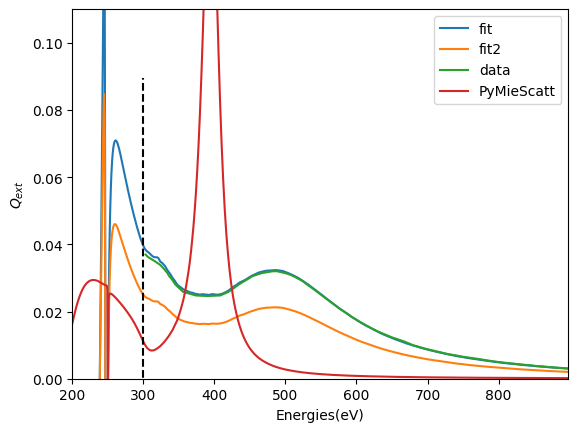

In [27]:
dataExtCoeff_07_035 = np.loadtxt(dataFolder+'Ag-Ag2O_07nm_035nm.csv', delimiter=',')
dataWavelengthTest = dataExtCoeff_07_035[:,0]
dataExtCoeffTest = dataExtCoeff_07_035[:,1]

#dielCoreStackRealTest = np.column_stack((energies, dielCoreTest.real))
#dielCoreStackImagTest = np.column_stack((energies, dielCoreTest.imag))

extCoeffCoreShellTest = funcAbsCoeffCoreShell(rCoreTest, rTotTest, wavelengths, dielCoreTest, dielShell, nWater)
extCoeffCoreShellTestFixed = funcAbsCoeffCoreShell(rCoreTest, rTotTest, wavelengths, dielCoreTest, dielShell, nWaterFixed)

Figure, ax = plt.subplots()
ax.plot(wavelengths, extCoeffCoreShellTest*1.5, label = 'fit')
ax.plot(wavelengths, extCoeffCoreShellTestFixed, label = 'fit2')
ax.plot(dataWavelengthTest, dataExtCoeffTest, label = 'data')
ax.plot(wavelengths, np.array(qsCoreShell)/27, label = 'PyMieScatt')
ax.vlines(300, min(extCoeffCoreShellTest), max(extCoeffCoreShellTest), linestyle = '--', color = 'black')
ax.set_xlabel('Energies(eV)')
ax.set_ylabel('$Q_{ext}$')
ax.set_xlim(wavelengths[-1], wavelengths[0])
ax.set_ylim(0, 0.11)
ax.legend()
plt.show()



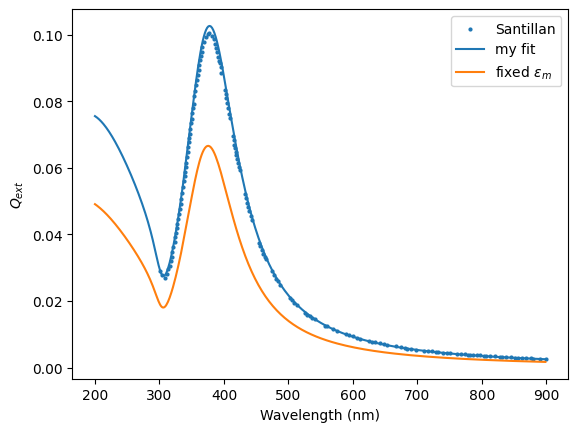

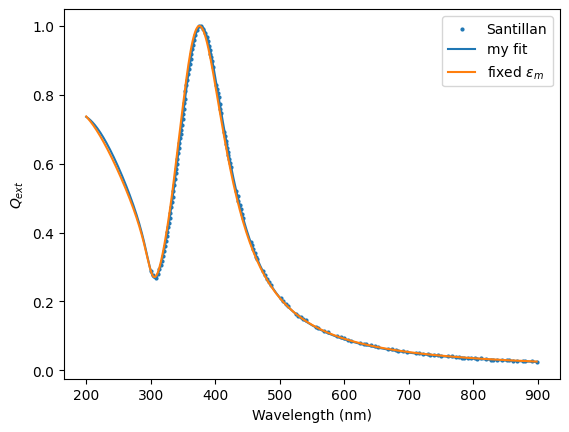

Maximum of a 0.7nm NP is at $\lambda:$ 377.7 nm


In [28]:
dataAgCoreOnly = np.loadtxt(dataFolder+'07nmAgCoreOnly.csv', delimiter=',')
extCoeffCoreOnlyCompare = funcExtCoeff(rCoreTest, wavelengths, dielCoreTest, nWater)
extCoeffCoreOnly2 = funcExtCoeff(rCoreTest, wavelengths, dielCoreTest, nWaterFixed)

figure, ax = plt.subplots()
ax.scatter(dataAgCoreOnly[:,0], dataAgCoreOnly[:,1], s=4, label='Santillan')
ax.plot(wavelengths, extCoeffCoreOnlyCompare*1.5, label='my fit')
ax.plot(wavelengths, extCoeffCoreOnly2, label='fixed $\\varepsilon_m$')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{ext}$')
ax.legend()
plt.show()

figure, ax = plt.subplots()
ax.scatter(dataAgCoreOnly[:,0], dataAgCoreOnly[:,1]/max(dataAgCoreOnly[:,1]), s=4, label='Santillan')
ax.plot(wavelengths, extCoeffCoreOnlyCompare/max(extCoeffCoreOnlyCompare), label='my fit')
ax.plot(wavelengths, extCoeffCoreOnly2/max(extCoeffCoreOnly2), label='fixed $\\varepsilon_m$')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{ext}$')
ax.legend()
plt.show()

print('Maximum of a {:.4g}nm NP is at $\\lambda:$ {:.4g} nm' .format(rCoreTest, wavelengths[np.argmax(extCoeffCoreOnlyCompare)]))

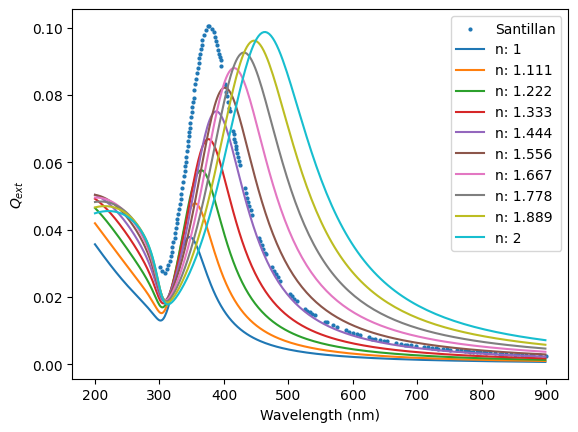

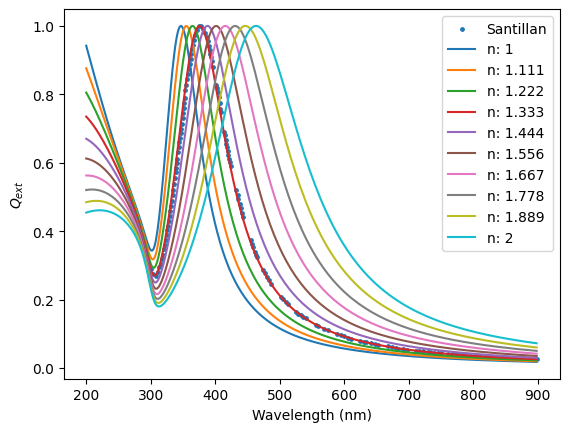

In [29]:
#n Medium test
nMedium = np.linspace(1,2,10)

figure, ax = plt.subplots()
ax.scatter(dataAgCoreOnly[:,0], dataAgCoreOnly[:,1], s=4, label='Santillan')
for ni in nMedium:
    n = np.empty(wavelengths.shape, dtype=complex)
    n.real = ni*np.ones(len(wavelengths))
    n.imag = np.zeros(len(wavelengths))
    extCoeff = funcExtCoeff(rCoreTest, wavelengths, dielCoreTest, n)
    ax.plot(wavelengths, extCoeff, label='n: {:.4g}' .format(ni))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{ext}$')
ax.legend()
plt.show()

figure, ax = plt.subplots()
ax.scatter(dataAgCoreOnly[:,0], dataAgCoreOnly[:,1]/max(dataAgCoreOnly[:,1]), s=6, label='Santillan')
for ni in nMedium:
    n = np.empty(wavelengths.shape, dtype=complex)
    n.real = ni*np.ones(len(wavelengths))
    n.imag = np.zeros(len(wavelengths))
    extCoeff = funcExtCoeff(rCoreTest, wavelengths, dielCoreTest, n)
    ax.plot(wavelengths, extCoeff/max(extCoeff), label='n: {:.4g}' .format(ni))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{ext}$')
ax.legend()
#ax.set_xlim(270, 350)
plt.show()
    

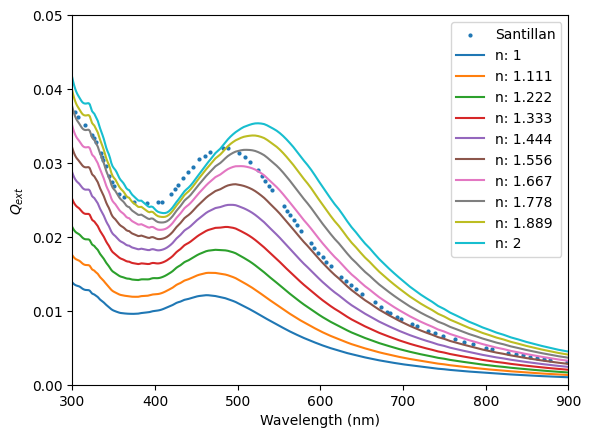

In [30]:
figure, ax = plt.subplots()
ax.scatter(dataExtCoeff_07_035[:,0], dataExtCoeff_07_035[:,1], s=4, label='Santillan')
for ni in nMedium:
    n = np.empty(wavelengths.shape, dtype=complex)
    n.real = ni*np.ones(len(wavelengths))
    n.imag = np.zeros(len(wavelengths))
    extCoeff = funcAbsCoeffCoreShell(rCoreTest, rTotTest, wavelengths, dielCoreTest, dielShell, n)
    ax.plot(wavelengths, extCoeff, label='n: {:.4g}' .format(ni))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{ext}$')
ax.set_xlim(300, 900)
ax.set_ylim(0, 0.05)
ax.legend()
plt.show()


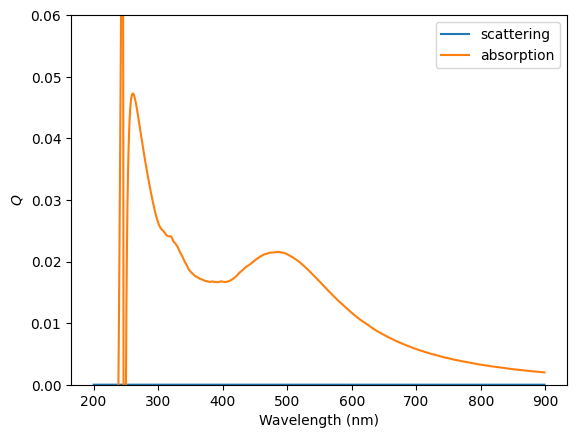

In [31]:

scaCoeff = funcScaCoeffCoreShell(rCoreTest, rTotTest, wavelengths, dielCoreTest, dielShell, nWater)
absCoeff = funcAbsCoeffCoreShell(rCoreTest, rTotTest, wavelengths, dielCoreTest, dielShell, nWater)
fullExtCoeff = funcExtCoeffCoreShell(rCoreTest, rTotTest, wavelengths, dielCoreTest, dielShell, nWater)


figure, ax = plt.subplots()
ax.plot(wavelengths, scaCoeff, label = 'scattering')
ax.plot(wavelengths, absCoeff, label = 'absorption')
#ax.plot(wavelengths, fullExtCoeff, label = 'extinction')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q$')
ax.legend()
ax.set_ylim(0, 0.06)
plt.show()

# Size influence

Maximum of a 0.7nm NP is at $\lambda:$ 377.7 nm
Maximum of a 4nm NP is at $\lambda:$ 383.4 nm
Maximum of a 6nm NP is at $\lambda:$ 383.4 nm
Maximum of a 8nm NP is at $\lambda:$ 383.4 nm


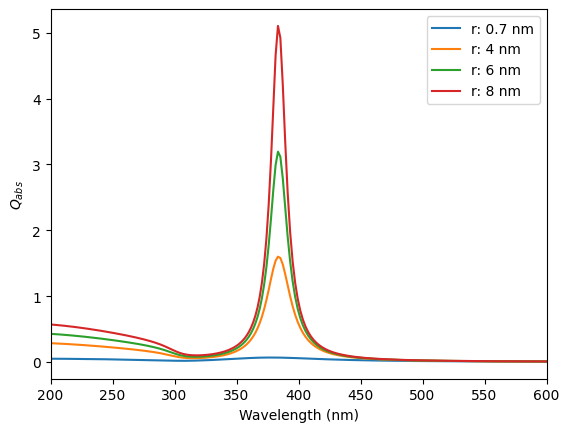

In [32]:
rs = [0.7,4,6,8]
figure, ax = plt.subplots()
for r in rs:
    rAbs = np.array([singleFullAbsCoeffCore(r, energies[i], Eplasma, gammaBu, Eg, gammaIB, Ef, Tamb, nWater[i]) for i in range(len(energies))])
    ax.plot(wavelengths, rAbs, label = 'r: {:.4g} nm' .format(r))
    print('Maximum of a {:.4g}nm NP is at $\\lambda:$ {:.4g} nm' .format(r, wavelengths[np.argmax(rAbs)]))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{abs}$')
ax.set_xlim(200,600)
ax.legend()
plt.show()



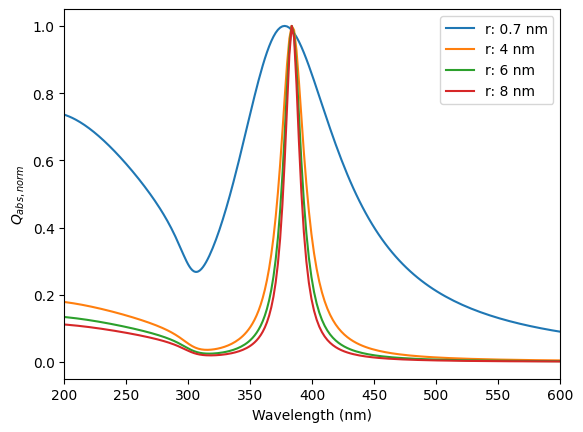

In [33]:
figure, ax = plt.subplots()
for r in rs:
    rAbs = np.array([singleFullAbsCoeffCore(r, energies[i], Eplasma, gammaBu, Eg, gammaIB, Ef, Tamb, nWater[i]) for i in range(len(energies))])
    ax.plot(wavelengths, rAbs/max(rAbs), label = 'r: {:.4g} nm' .format(r))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{abs, norm}$')
ax.set_xlim(200,600)
ax.legend()
plt.show()

# Shell influence

Maximum of a 5.1nm NP is at $\lambda:$ 391.2 nm
Maximum of a 5.4nm NP is at $\lambda:$ 412.2 nm
Maximum of a 5.7nm NP is at $\lambda:$ 425.9 nm
Maximum of a 6nm NP is at $\lambda:$ 443 nm


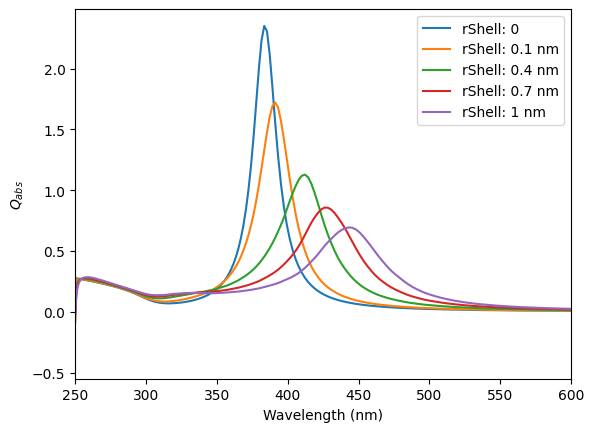

In [34]:
rSingle = 5
rsShell = rSingle + np.array([0.1, 0.4, 0.7, 1])
coreOnlyAbs = np.array([singleFullAbsCoeffCore(rSingle, energies[i], Eplasma, gammaBu, Eg, gammaIB, Ef, Tamb, nWater[i]) for i in range(len(energies))])

figure, ax = plt.subplots()
ax.plot(wavelengths, coreOnlyAbs, label = 'rShell: 0' )
for r in rsShell:
    rAbs = np.array([singleFullAbsCoeffCoreShell(rSingle, r, energies[i], Eplasma, gammaBu, Eg, gammaIB, Ef, Tamb, dielShell[i],nWater[i]) for i in range(len(energies))])
    ax.plot(wavelengths, rAbs, label = 'rShell: {:.4g} nm' .format(r-rSingle))
    print('Maximum of a {:.4g}nm NP is at $\\lambda:$ {:.4g} nm' .format(r, wavelengths[np.argmax(rAbs)]))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{abs}$')
ax.set_xlim(250,600)
ax.legend()
plt.show()

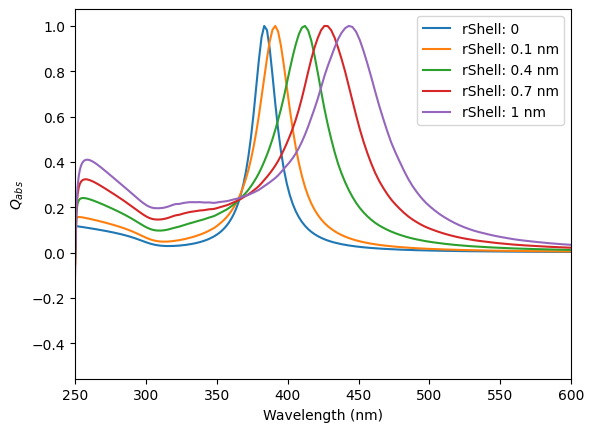

In [35]:
figure, ax = plt.subplots()
ax.plot(wavelengths, coreOnlyAbs/max(coreOnlyAbs), label = 'rShell: 0' )
for r in rsShell:
    rAbs = np.array([singleFullAbsCoeffCoreShell(rSingle, r, energies[i], Eplasma, gammaBu, Eg, gammaIB, Ef, Tamb, dielShell[i],nWater[i]) for i in range(len(energies))])
    ax.plot(wavelengths, rAbs/max(rAbs), label = 'rShell: {:.4g} nm' .format(r-rSingle))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{abs}$')
ax.set_xlim(250,600)
ax.legend()
plt.show()

# Relative Core Shell size influence

Maximum of a 7.1nm NP is at $\lambda:$ 389.2 nm
Maximum of a 7.4nm NP is at $\lambda:$ 403.5 nm
Maximum of a 7.7nm NP is at $\lambda:$ 416.6 nm
Maximum of a 8nm NP is at $\lambda:$ 428.2 nm


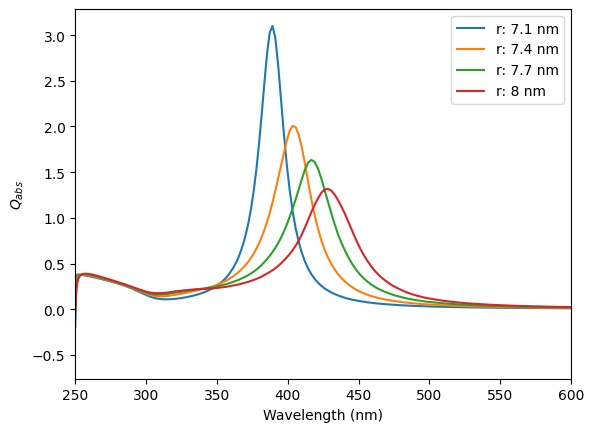

In [36]:
rSingle = 7
rsShell = rSingle + np.array([0.1, 0.4, 0.7, 1])

figure, ax = plt.subplots()
for r in rsShell:
    rAbs = np.array([singleFullAbsCoeffCoreShell(rSingle, r, energies[i], Eplasma, gammaBu, Eg, gammaIB, Ef, Tamb, dielShell[i],nWater[i]) for i in range(len(energies))])
    ax.plot(wavelengths, rAbs, label = 'r: {:.4g} nm' .format(r))
    print('Maximum of a {:.4g}nm NP is at $\\lambda:$ {:.4g} nm' .format(r, wavelengths[np.argmax(rAbs)]))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{abs}$')
ax.set_xlim(250,600)
ax.legend()
plt.show()

# Drude Parameters Influence

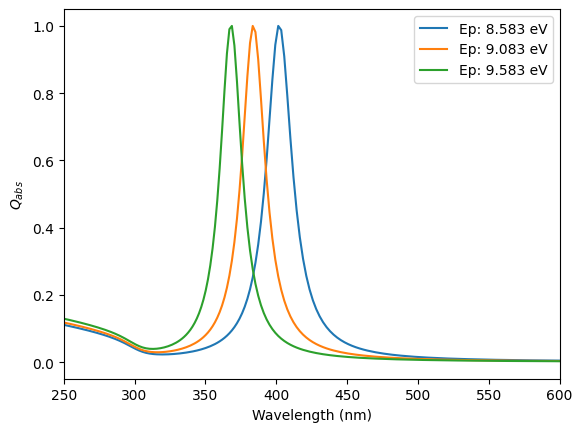

In [37]:
rPlasma = 5
EsPlasma = [Eplasma-0.5, Eplasma, Eplasma+0.5]

figure, ax = plt.subplots()
for Ep in EsPlasma:
    absCoeffEp = fullAbsCoeffCore(rPlasma, energies, Ep, gammaBu, Eg, gammaIB, Ef, Tamb, nWater)
    ax.plot(wavelengths, absCoeffEp/max(absCoeffEp), label = 'Ep: {:.4g} eV' .format(Ep))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{abs}$')
ax.set_xlim(250,600)
ax.legend()
plt.show()

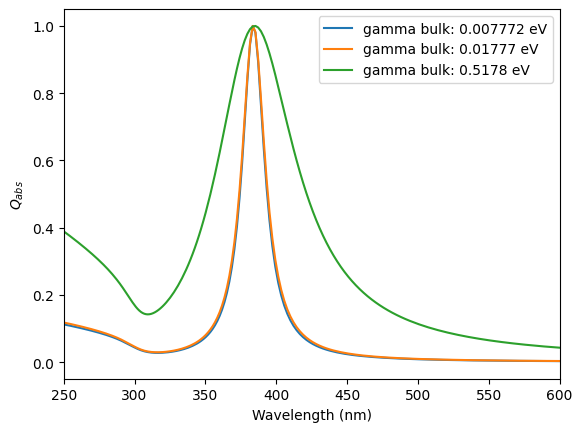

In [38]:
gammasBu = [gammaBu-0.01, gammaBu, gammaBu+0.5]

figure, ax = plt.subplots()
for gBu in gammasBu:
    absCoeffEp = fullAbsCoeffCore(rPlasma, energies, Eplasma, gBu, Eg, gammaIB, Ef, Tamb, nWater)
    ax.plot(wavelengths, absCoeffEp/max(absCoeffEp), label = 'gamma bulk: {:.4g} eV' .format(gBu))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{abs}$')
ax.set_xlim(250,600)
ax.legend()
plt.show()

# Interband parameters influence

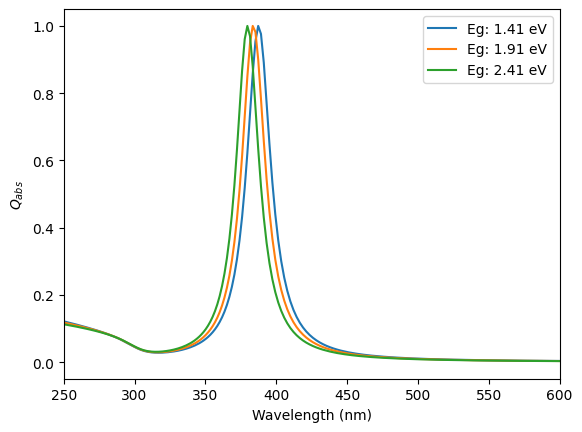

In [39]:
rPlasma = 5
Egs = [Eg-0.5, Eg, Eg+0.5]

figure, ax = plt.subplots()
for Egap in Egs:
    absCoeffEp = fullAbsCoeffCore(rPlasma, energies, Eplasma, gammaBu, Egap, gammaIB, Ef, Tamb, nWater)
    ax.plot(wavelengths, absCoeffEp/max(absCoeffEp), label = 'Eg: {:.4g} eV' .format(Egap))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{abs}$')
ax.set_xlim(250,600)
ax.legend()
plt.show()

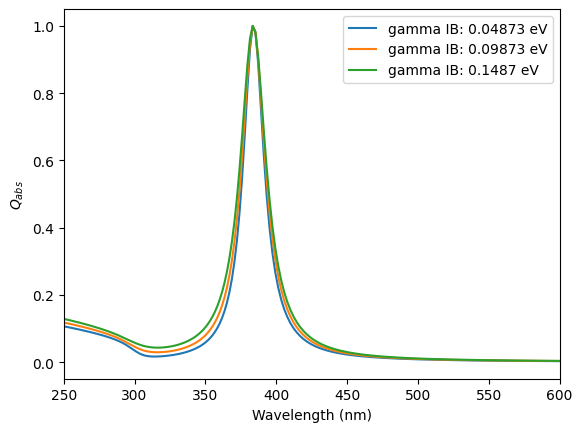

In [40]:
rPlasma = 5
gammasIB = [gammaIB-0.05, gammaIB, gammaIB+0.05]

figure, ax = plt.subplots()
for gIB in gammasIB:
    absCoeffEp = fullAbsCoeffCore(rPlasma, energies, Eplasma, gammaBu, Eg, gIB, Ef, Tamb, nWater)
    ax.plot(wavelengths, absCoeffEp/max(absCoeffEp), label = 'gamma IB: {:.4g} eV' .format(gIB))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$Q_{abs}$')
ax.set_xlim(250,600)
ax.legend()
plt.show()

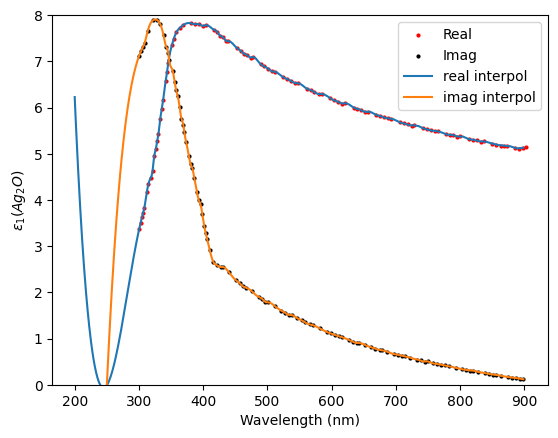

In [41]:
#Testing
figure, ax = plt.subplots()
ax.scatter(dataDielShellReal[:,0], dataDielShellReal[:,1], s=4, label='Real', color = 'red')
ax.scatter(dataDielShellImag[:,0], dataDielShellImag[:,1], s=4, label='Imag', color = 'black')
ax.plot(wavelengths, dielShell.real, label = 'real interpol')
ax.plot(wavelengths, dielShell.imag, label = 'imag interpol')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$\\varepsilon_1(Ag_2O)$')
ax.set_ylim(0, 8)
ax.legend()
plt.show()

